In [19]:
import cv2
import json
import os
import glob
import matplotlib.pyplot as plt

In [4]:
!ls

dd.zip	   test_color	   test_edge  test_label  test_pose
lower.zip  test_colormask  test_img   test_mask   Untitled.ipynb


In [8]:
label_path = 'test_label/*' 
pose_path = 'test_pose/*'
img_path = 'test_img/*'

In [9]:
label_flist = glob.glob(label_path)
pose_flist = glob.glob(pose_path)
img_flist = glob.glob(img_path)

In [47]:
label_flist.sort()
pose_flist.sort()
img_flist.sort()

In [84]:
with open(pose_flist[0], "r") as f:
    data = json.load(f)
keypoints = data["people"][0]["pose_keypoints"]

In [85]:
image = cv2.imread(img_flist[0])
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for i in range(0, len(keypoints), 3):
    x, y = int(keypoints[i]), int(keypoints[i+1])
    cv2.circle(image, (x, y), 5, (0, 0, 255), -1)

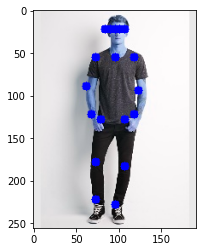

In [86]:
plt.imshow(image)

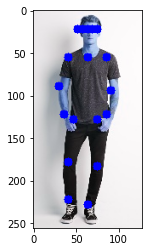

In [87]:
newImg = image[:,32:-32]
plt.imshow(newImg)

In [62]:
newImg.shape

(256, 192, 3)

In [66]:
image = cv2.imread(label_flist[0])
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for i in range(0, len(keypoints), 3):
    x, y = int(keypoints[i]), int(keypoints[i+1])
    cv2.circle(image, (x, y), 5, (0, 0, 255), -1)

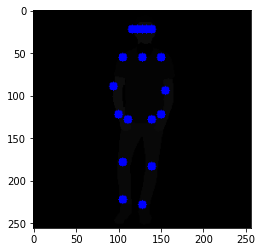

In [67]:
plt.imshow(image)

In [72]:
cv2.imwrite('test.jpg', image)

True

In [83]:
leng = len(label_flist)
for i in range(leng):
    image = cv2.imread(label_flist[i])
    cv2.imwrite (label_flist[i], image[:,32:-32])
     
    image = cv2.imread(img_flist[i])
    cv2.imwrite (img_flist[i], image[:,32:-32])

    with open(pose_flist[i], "r") as f:
        data = json.load(f)
    for person in data['people']:
        for j in range(0, len(person['pose_keypoints']), 3):
            person['pose_keypoints'][j] -= 32
    with open(pose_flist[i], 'w') as f:
        json.dump(data, f)    